# Make shapefile out of polygons that ran

This notebook checks whether the polygon drill ran on all the polygons in the input shapefile.

_inputs_  
- a csv saved from the QGIS attribute table of the original shapefile
- path to the output directory containing results for each shapefile
- somewhere to save the output shapefile

load some modules

In [2]:
import xarray as xr
import pandas as pd
import csv
import os
import fiona
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt

where is my csv?

In [3]:
path_to_csv_attribute_table = '/g/data/r78/rjd547/shapefiles/DCDB_NW_LGA_aoi_attribute_table.csv'

read in the csv using pandas

In [5]:
lra = pd.read_csv(path_to_csv_attribute_table)

read filenames from directory, add to dataframe, and compare against ramsar list


In [6]:
#make an empty list of the files that ran
lra_run = []
#for each file in the output directory
for file in os.listdir('/g/data/r78/rjd547/LRA/LRA_Outputs_v2/'):
    #if it's a csv file
    if file.endswith(".csv"):
        #add it to our list
        lra_run.append(file)  

look at the first five successful polyons

In [7]:
lra_run[0:5]

['21SP206715_617311-Cloncurry-2428.csv',
 '342SP273458_703340-Duchess-2498.csv',
 '16N14833_179056-Normanton-1043.csv',
 '2N1486_179005-Normanton-1687.csv',
 '5MK74_237083-Corfield-205.csv']

use the index of the wetland shapefile to get all the original shapefile indices

In [35]:
lra.index

RangeIndex(start=0, stop=16165, step=1)

In [36]:
#get the shapefile index as a list
all_index = lra.index.tolist()
#make list match up with the objectIDs we used to write the fle
all_index_oids = [x+1 for x in all_index]

use some string manipulation to get the index of the missing polgons out of the list of files in the output directory

In [38]:
#get list of runs
run_list = []
for i in lra_run:
    i = i.split('-') #break up filenamea
    i = i[-1] #get last bit
    i = i.split('.')[0]
    i =int(i)
    run_list.append(i)

use set math to find which indexes are present in the original list and not the output directory

In [39]:
missing_runs = set(all_index_oids) - set(run_list)
print(len(missing_runs))

6851


In [40]:
#turn the set of missing runs back into a list
missing_runs = list(missing_runs)

In [41]:
missing_runs.sort()

In [42]:
missing_runs[0:10]

[3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170]

In [43]:
#the original shapefile
lra_shapes =  '/g/data/r78/rjd547/shapefiles/DCDB_NW_LGA_aoi.shp'

open the original shapefile. Use the index ['id'] of the missing runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [52]:
with fiona.open(lra_shapes) as inshape:
    print(inshape[0])

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('OBJECTID', 1), ('Join_Count', 1), ('TARGET_FID', 2926), ('JOIN_FID', 60212), ('Join_Cou_1', 1), ('TARGET_F_1', 2926), ('JOIN_FID_1', 86645), ('LOT', '2461'), ('PLAN', 'SP273186'), ('LOTPLAN', '2461SP273186'), ('SEG_NUM', 165), ('PAR_NUM', 161), ('SEGPAR', 165161), ('PAR_IND', 0), ('LOT_AREA', 115000000.0), ('EXCL_AREA', 0.0), ('LOT_VOLUME', 0.0), ('SURV_IND', 'N'), ('TENURE', 'Lands Lease'), ('PRC', 6000), ('PARISH', 'No Longer Used'), ('COUNTY', 'No Longer Used'), ('LAC', 2250), ('SHIRE_NAME', 'Carpentaria Shire'), ('FEAT_NAME', 'Kelwood'), ('ALIAS_NAME', None), ('LOC', 3281), ('LOCALITY', 'Normanton'), ('PARCEL_TYP', 'Lot Type Parcel'), ('COVER_TYP', 'Base'), ('ACC_CODE', 'UPGRADE ADJUSTMENT - 5M'), ('CA_AREA_SQ', 3747823.645), ('SMIS_MAP', 'https://apps.information.qld.gov.au/data/cadastre/GenerateSmartMap?q=2461\\SP273186'), ('FEATURETYP', 'Rural Property'), ('NAME', 'Kelwood'), ('FEATUREREL', '2016-04-13'), ('FEATURESOU',

In [53]:
with fiona.open(lra_shapes) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/shapefiles/LRA_notrun_v1.shp','w',**meta) as outshape:
        for feature in inshape:
                if int(feature['properties']['OBJECTID']) in missing_runs:
                    LOTPLANSEGPAR = f"{feature['properties']['LOTPLAN']}_{feature['properties']['SEGPAR']}"
                    OBJECTID = feature['properties']['OBJECTID']
                    LOCALITY = feature['properties']['LOCALITY']
                    polyName = f'{LOTPLANSEGPAR}-{LOCALITY}-{OBJECTID}'                 
                    print(polyName)   
                    outshape.write(feature)

3TO9_62305019-Mckinlay-3161
11SP101950_62305111-Mckinlay-3162
10SP101950_62305112-Mckinlay-3163
BAP13512_62305114-Kynuna-3164
AAP13583_62305115-Mckinlay-3165
1TO13_62305014-Mckinlay-3166
3TO30_62305015-Mckinlay-3167
3720PH222_62305016-Mckinlay-3168
7EN122_62305017-Mckinlay-3169
3TO9_62305018-Mckinlay-3170
4TO42_62305050-Kynuna-3171
13TO37_62305034-Mckinlay-3172
10TO38_62305035-Kynuna-3173
4TO42_62305037-Kynuna-3174
8TO38_62305039-Kynuna-3175
4TO42_62305057-Kynuna-3176
1TO5_62305058-Kynuna-3177
8CP905672_63076045-Hughenden-3178
350SP276167_36389124-Opalton-3179
6CP905672_63076043-Hughenden-3180
3030PH243_719016-Kuridala-3224
131SP262316_719019-Kuridala-3225
4WDK25_36380062-Middleton-3226
7DG139_63076027-Prairie-3227
2WDK26_36380063-Middleton-3228
4WDK25_36380065-Middleton-3229
23WDK31_36380066-Middleton-3230
1WM25_36382012-Middleton-3231
2WM25_36382013-Middleton-3232
4WM25_36382014-Middleton-3233
3WM13_36382015-Middleton-3234
111SP136519_62962119-Karumba-3235
114SP136519_62962116-Karumb

In [13]:
missing_runs

[228, 229, 230, 231, 105, 266, 12, 125, 185, 90, 93, 94]

open the original shapefile. Use the index ['id'] of the runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [16]:
dodgy_runs = 63
print (dodgy_runs)


63


In [ ]:
#remove the dodgy run

In [25]:
run_list[0:5]

[117, 227, 146, 236, 140]

In [26]:
 run_list.remove(63)

In [31]:
#set(run_list)

In [32]:
#this time we just create a json file of the actual runs
with fiona.open(ramsar_shapes) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/Ramsar_Wetlands/shapefiles/Ramsar_exploded5.shp','w',**meta) as outshape:
        for feature in inshape:
                if int(feature['id']) in run_list:
                    print(feature['properties']['WETLAND_NA'])   
                    outshape.write(feature)
                   
                    

Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Kakadu_National_Park
Kakadu_National_Park
Moulting_Lagoon
Logan_Lagoon
Lavinia
Pitt_Water-Orielton_Lagoon
Pitt_Water-Orielton_Lagoon
Pitt_Water-Orielton_Lagoon
Apsley_Marshes
East_Coast_Cape_Barren_Island_Lagoons
Flood_Plain_Lower_Ringarooma_River
Jocks_Lagoon
Interlaken_(Lake_Crescent)
Little_Waterhouse_Lake
Corner_Inlet
Barmah_Forest
Gunbower_Forest
Lake_Arawak
Lake_Bitterang
Lake_Brockie
Lake_Bulla
Lake_Cantala
Lake_Hattah
Lake_Konardin
Lake_Kramen
Lake_Lockie
Lake_Mournpall
Lake_Yelwell
Lake_Yerang
Cemetery_Swamp
Cemetery_Swamp
Fosters_Swamp
Hird_Swamp
Johnson_Swamp
Kangaroo_Lake
Lake_Charm
Lake_Cullen
Lake_Kelly
Lake_Tutchewop
Lake_William
Reedy_Lake
Stevensons_Swamp
The_Marshes
Town_Swamp
Corio_Bay
Lake_Connewarre
Mud_Island
Point_Cook
Swan_Bay
Werribee_River
Western_

open the new shapefile to check what was written out as a new shapefile.

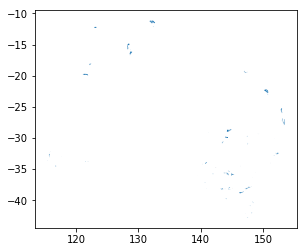

In [33]:
outshape_written = gpd.read_file('/g/data/r78/rjd547/Ramsar_Wetlands/shapefiles/Ramsar_exploded5.shp')
outshape_written.plot()
plt.show()